## Linear Regression

Y = wX + b  (mX + b)



Y : Dependent Variable
X : Independent Variable
w : weight
b : bias

## We will use Gradient Descent:
Grdient descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the
parameters  of the learning model.


w = w_old - lambda * dw

b = w_old - lambda * db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function

![image.png]()



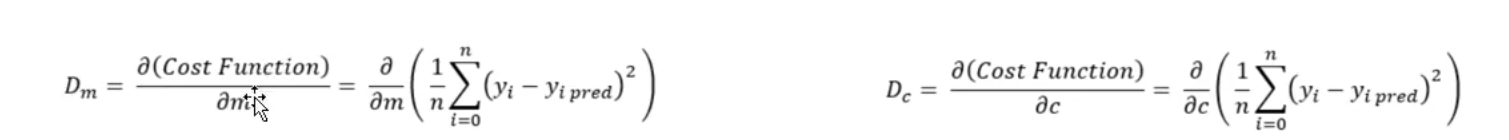

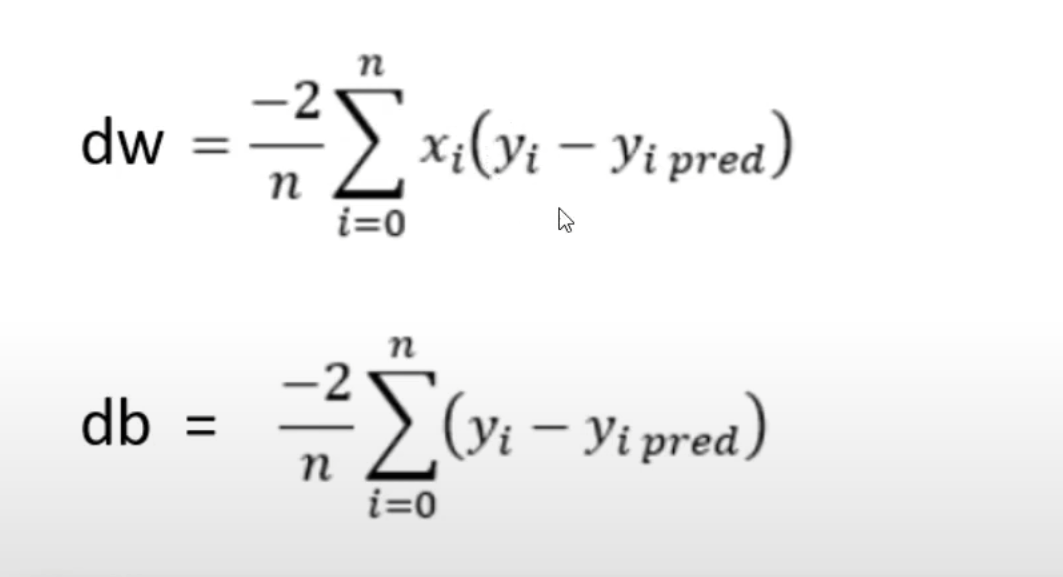

In [33]:
# importing numpy
import numpy as np

## **Linear Regression**

In [34]:
class Linear_Regression():

  # initiating the parameters (learning rate and no of iterations )

  def __init__(self,learning_rate,no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations







  def fit(self,X,Y):
    # number of training examples and number of features
    self.m , self.n  = X.shape # number of rows (m) & columns (n)

    # Initiating the weight and bias

    self.w = np.zeros(self.n) # createad an array of zeros with n elements
    self.b = 0
    self.X = X
    self.Y = Y

    # Implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()






  def update_weights(self,):
    Y_prediction = self.predict(self.X)

    #calculate gradients
    dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) // self.m


    db = -2*np.sum(self.Y - Y_prediction)/self.m



    # updating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db







  def predict(self,X):
    return X.dot(self.w) + self.b # here w is a numpy array that's why dot product






In [35]:
#Using Linear Regression Model for Prediction

In [36]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [37]:
# Data Pre- Processing

# loading the data from csv file to a pandas datafram
salary_data = pd.read_csv('/content/drive/MyDrive/Linear regression/salary_data.csv')

In [38]:
# prining the first  5 columns of hte dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [39]:
# last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
27,9.0,112635
28,9.5,122391
29,9.6,121872
30,10.3,123456
31,10.5,124567


In [40]:
# number of rows & columns in the dataframe

salary_data.shape

(32, 2)

In [41]:
# checking for missing values

salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [42]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [43]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [44]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872
 123456 124567]


In [45]:
# Splitting the dataset into training and test data

X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=2)

In [46]:
# Training the linear Regression model

model = Linear_Regression(learning_rate = 0.02,no_of_iterations=1000)

In [47]:
# let's fit the model in training data

model.fit(X_train,Y_train)



In [48]:
# printing the parameter value (weights and bias)

print('weights = ', model.w[0])
print('bias = ',model.b)

weights =  10050.879999999903
bias =  25838.37577085119


In [49]:
 #prediction of the salary value for test data
 test_data_prediction= model.predict(X_test)

In [50]:
print(test_data_prediction)

[ 85138.56777085  36894.34377085  97199.62377085  66041.89577085
 122326.82377085  63026.63177085  38904.51977085  86143.65577085
  67046.98377085  71067.33577085]


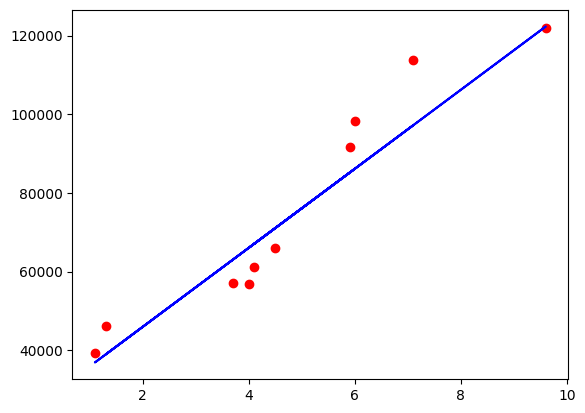

In [54]:
#Visulaizing the predicted value & actal Values

plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabal('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()